<a href="https://colab.research.google.com/github/piyush123/CKAD-exercises/blob/master/Intro_to_LlamaIndex_Workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LlamaIndex Workshop 🦙

Today we will:
>* 📑 Create LlamaIndex `Documents`
>* 🗂️  Create LlamaIndex `Nodes`
>* 📚 Create LlamaIndex `Indices`
>* 🔍 Create a Query Engine


Ending with a Final Exercise 🚀

### Installation and Setup


In [ ]:
!pip install llama-index

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.4/225.4 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.2
    Uninstalling beautifulsoup4-4.11.2:
      Successfully uninst

In [ ]:
from google.colab import userdata
API_KEY = userdata.get('temp_openai')

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = API_KEY

---

# Create Llamaindex Documents 📑

> 💡 Data Connectors (AKA Readers) facilitate the process of ingesting data from various sources and formats

> 💡 Data Connectors convert data into Documents representations, containing both text and metadata

> 🎯 Create a Reader to ingest data from the Wikipedia Pages for Iceland, Kenya and Cambodia into `Documents`



In [ ]:
from llama_index import download_loader

Wiki_Reader = download_loader('WikipediaReader')

loader = Wiki_Reader()

wiki_documents = loader.load_data(pages=["Iceland Country", "Kenya Country", "Cambodia Country"])

> 💡 Explore more data connectors on [Llamahub](https://llamahub.ai/?tab=loaders)
>> **LlamaHub** is an open-source repository that hosts different types of data connectors to be integrated into your LlamaIndex applications. These connectors, available on the hub, can all be used as so:
>>```python
from llama_index import download_loader
Your_Reader = download_loader('READER_NAME')
loader = Your_Reader()
documents = loader.load_data(document_ids=[...])
```


---
# Create LlamaIndex Nodes 🗂️

> 💡 An optional step we can take to further process our `Documents` is breaking it up into ```Nodes```
>> This creates a more structured and relational index because nodes also include metadata and relationship information with other nodes

> 🎯 Use the ```SimpleNodeParser.from_defaults``` from the NodeParser classes to parse your documents into nodes
>> ### Parameters:
>> ``` -chunk_size: The token overlap of each chunk when splitting
-chunk_overlap: The token chunk size for each chunk
-secondary_chunking_regex: Backup regex for splitting into sentences
-seperator: Default separator for splitting into words
```


In [ ]:
from llama_index.node_parser import SimpleNodeParser

# Initialize the parser
parser = SimpleNodeParser.from_defaults(chunk_size=1024, chunk_overlap=20, secondary_chunking_regex='[^,.;。？！]+[,.;。？！]?', separator=' ')

# Parse documents into nodes
wiki_nodes = parser.get_nodes_from_documents(wiki_documents)

> 💡 You can explore more NodeParsers [here](https://docs.llamaindex.ai/en/stable/api_reference/service_context/node_parser.html)!

---
# Create LlamaIndex Index 📚

> 💡  At its core, LlamaIndex is about building structured indices for ingested data, faciliating efficient querying over the data

> 🎯 Build ```Indices``` for both your ```Documents``` and ```Nodes``` using the ```VectoreStoreIndex``` index data structure

In [ ]:
from llama_index.indices.document_summary import DocumentSummaryIndex

# How to build Indexes for Documents Object
doc_index = DocumentSummaryIndex.from_documents(wiki_documents)

# How to build Indexes for Nodes Object
node_index = DocumentSummaryIndex(wiki_nodes)

current doc id: 909446af-7b6c-4ef1-8e60-cf56e30b05cd
current doc id: 40814ede-f558-4fab-97c1-17c067f9452c
current doc id: da4488a9-26a0-428c-944f-bf401c2b89f6
current doc id: 909446af-7b6c-4ef1-8e60-cf56e30b05cd
current doc id: 40814ede-f558-4fab-97c1-17c067f9452c
current doc id: da4488a9-26a0-428c-944f-bf401c2b89f6


> 💡 There are several **index data structures**, each handeling data in different ways. These can be viewed in more detail [here](https://docs.llamaindex.ai/en/stable/api_reference/indices.html#ref-indices).

> ### 💡 What is Happening Under the Hood?
>* `Documents` are transformed into `Node` objects, serving as lightweight abstractions over text strings while also tracking *metadata* and *relationships*
>* Specialized calculations and processes are executed to incorporate Nodes into the **index data structure**
>> ex: For the `VectorStoreIndex` index data structure, an embedding model is invoked (either via API or locally) to compute embeddings for the Node objects






---
# Store LlamaIndex Index 💾

> 💡 LlamaIndex provides adaptable storage options, allowing users to easily manage and persist their data for future use

> 🎯 Use the `persist()` method to store your node_index/data

> 🎯 Use the `load_index_from_storage()` method to retrieve your node_index/data


In [ ]:
# Persisting to disk
node_index.storage_context.persist(persist_dir="Wikipedia_Pages")

> 💡 Confirm the save by checking your "Files" tab on the left
>>---
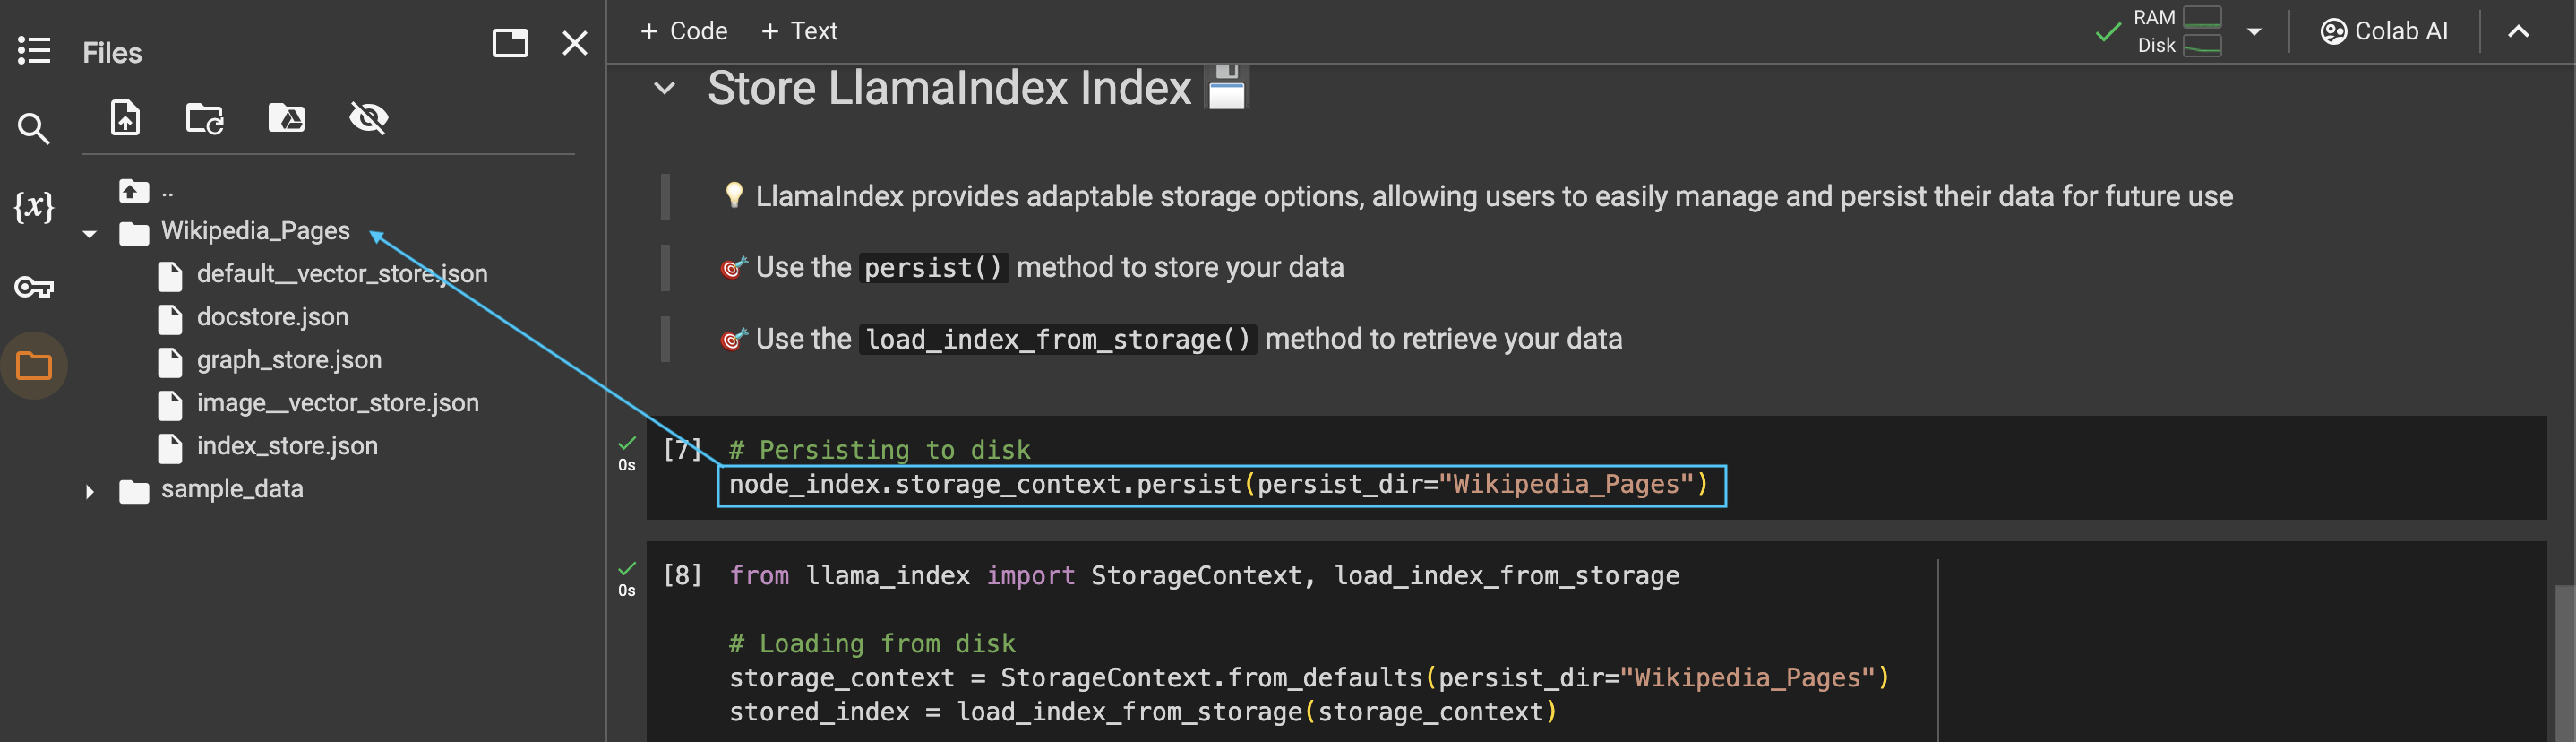

In [ ]:
from llama_index import StorageContext, load_index_from_storage

# Loading from disk
storage_context = StorageContext.from_defaults(persist_dir="Wikipedia_Pages")
stored_index = load_index_from_storage(storage_context)


---
# Create a Query Engine 🔍

> 🎯 Using `your_index.as_query_engine()` Query API, create a query engine and use the `query()` method to execute a query

In [ ]:
query_engine = node_index.as_query_engine()

response = query_engine.query("When was Iceland discovered?")

print(response)

Iceland was discovered by Norseman Naddodd in the 9th century.


> 💡 You can also run the same code using `stored_index` instead
>> ```
query_engine = stored_index.as_query_engine()
response = query_engine.query("When was Iceland discovered?")
print(response)



In [ ]:
query_engine = stored_index.as_query_engine()

response = query_engine.query("Tell me about the Great Rift Valley in Kenya")

print(response)

The Great Rift Valley in Kenya is a significant geographical feature that spans from the northern to the southern part of the country. It showcases breathtaking landscapes, including mountains, lakes, and volcanoes. The Rift Valley is renowned for its rich wildlife and is a favored spot for tourists. This region is formed by the shifting of tectonic plates, resulting in the creation of steep cliffs and escarpments. The Great Rift Valley holds immense geological and ecological significance in Kenya.


> 💡 `.as_query_engine` creates the query engine with the default LlamaIndex settings. You can visit other query engines [here](https://docs.llamaindex.ai/en/stable/module_guides/deploying/query_engine/root.html)!

In [ ]:
query_engine = stored_index.as_query_engine()

response = query_engine.query("What are the specific forms of government in Iceland, Kenya, and Cambodia?")

print(response)

The forms of government in Iceland, Kenya, and Cambodia are distinct and specific to each country. Iceland operates under a parliamentary republic system, where the government is typically appointed by the president after a general election to the Althing. Kenya, on the other hand, has a presidential republic form of government. Lastly, Cambodia follows a constitutional monarchy form of government.


> 💡 A single question can be answered using multiple documents by the query engine


---
# Customize Your Use Case 🛠

> ⚪ Parsing `Documents` into Smaller Chunks and a Larger Overlap <br>
> ⚪ Get a different Response <br>
> ⚪  Make a Conversational Chatbot

### 1) Parsing `Documents` into Smaller Chunks and a Larger Overlap

In [ ]:
# Parsing Documents into Smaller Chunks
parser = SimpleNodeParser.from_defaults(chunk_size=500, chunk_overlap=50)

# Parse documents into nodes
wiki_nodes2 = parser.get_nodes_from_documents(wiki_documents)

# Create an index
node_index = DocumentSummaryIndex(wiki_nodes2)

current doc id: 909446af-7b6c-4ef1-8e60-cf56e30b05cd
current doc id: 40814ede-f558-4fab-97c1-17c067f9452c
current doc id: da4488a9-26a0-428c-944f-bf401c2b89f6


In [ ]:
query_engine = node_index.as_query_engine()

response = query_engine.query("What are the specific forms of government in Iceland, Kenya, and Cambodia?")

print(response)

Iceland, Kenya, and Cambodia have different forms of government. Iceland has a parliamentary republic, Kenya has a presidential system, and Cambodia has a constitutional monarchy with a parliamentary system.


> 💡 Take a look at the responses to the query when `chunk_size=1024` and `chunk_overlap=20` versus `chunk_size=500` and `chunk_overlap=20`
>>* The choice between these settings may depend on the desired level of detail and coherence in the generated text


### 2) Get a different Response with `response_mode`

> 💡 `=compact` is a method that involves concatenating retrieved text chunks into a single compacted text, fitting within the context window.

> 💡 `=tree_summarize` is a summarization process that concatenates and recursively refines answers until a final summarized result is achieved.

> 💡 `=accumulate` method runs a query on each text chunk, collects responses in an array, and returns a concatenated string. Good for running the same query against each text chunk.

In [ ]:
query_engine = node_index.as_query_engine(response_mode="compact")
response = query_engine.query("What are the specific forms of government in Iceland, Kenya, and Cambodia?")
print(response)

Iceland, Kenya, and Cambodia have different forms of government. Iceland has a parliamentary republic, Kenya has a presidential republic, and Cambodia has a constitutional monarchy.


In [ ]:
query_engine = node_index.as_query_engine(response_mode="tree_summarize")
response = query_engine.query("What are the specific forms of government in Iceland, Kenya, and Cambodia?")
print(response)

Iceland has a parliamentary republic form of government, Kenya has a presidential system of government, and Cambodia has a constitutional monarchy with a parliamentary system of government.


In [ ]:
query_engine = node_index.as_query_engine(response_mode="accumulate")
response = query_engine.query("What are the specific forms of government in Iceland, Kenya, and Cambodia?")
print(response)

Response 1: Iceland has a specific form of government, but the context does not provide information about the specific forms of government in Kenya and Cambodia.
---------------------
Response 2: Iceland is a republic, Kenya is a presidential representative democratic republic, and Cambodia is a constitutional monarchy.
---------------------
Response 3: Iceland, Kenya, and Cambodia have different forms of government.
---------------------
Response 4: Iceland has a legislative and judicial assembly known as the Althing, which was established to regulate the Icelandic Commonwealth. However, the specific forms of government in Kenya and Cambodia are not mentioned in the given context.
---------------------
Response 5: Iceland, Kenya, and Cambodia have different forms of government. However, based on the context information provided, the specific forms of government in these countries are not mentioned. Therefore, I cannot provide the specific forms of government in Iceland, Kenya, and Cam

> 💡 Check out more `response_mode`s [here](https://docs.llamaindex.ai/en/stable/module_guides/deploying/query_engine/response_modes.html)!

### 3) Make a Conversational Chatbot with `node_index.as_chat_engine()`

In [ ]:
# Create a chat_engine (rather than a query_engine)
chat_engine = node_index.as_chat_engine()

user_q = "What are the specific forms of government in Iceland, Kenya, and Cambodia?"
print("User: ", user_q)
print("---------------------")

response = chat_engine.chat(user_q)
print("Chatbot: ", response)
print("---------------------")

user_resp = "Oh interesting, tell me more."
print("User: ", user_resp)
print("---------------------")

response = chat_engine.chat(user_resp)
print("Chatbot: ", response)

User: What are the specific forms of government in Iceland, Kenya, and Cambodia?
---------------------
Chatbot:  Iceland has a parliamentary republic form of government. Kenya has a presidential republic form of government. Cambodia has a constitutional monarchy form of government.
---------------------
User: Oh interesting, tell me more.
---------------------
Chatbot:  In Iceland, the government operates under a parliamentary republic system. This means that the country is led by a president who serves as the head of state, while the prime minister is the head of government. The president is elected by the people, and the prime minister is appointed by the president. The parliament, known as the Althingi, is responsible for making laws and overseeing the government's activities.

In Kenya, the government follows a presidential republic system. This means that the country is led by a president who serves as both the head of state and the head of government. The president is elected by 



---

# Final Exercise 🚀

## Building a Medical Chatbot
 > 🎯 Create a Pubmed Dataloader using [Pubmed Papers Loader](https://llamahub.ai/l/papers-pubmed?from=loaders) on LlamaHub <br><br>
 > 🎯 Load in Documents for `search_query='tinnitus'` <br><br>
 > 🎯 Utilizing `VectorStoreIndex.from_documents`, index your Documents <br>
 > -💡 `Documents` or `Nodes` and their embeddings are stored in a `Vector Store`, and queries fetch the top-k most similar Documents/Nodes<br>
  > -💡 View more Indices [here](https://docs.llamaindex.ai/en/stable/api_reference/indices.html#ref-indices)!<br><br>
 > 🎯 Store and Load in your Index as `stored_index` <br><br>
 > 🎯 Create a `query_engine()` from your `index` <br><br>
 > 🎯 Build the following conversation:
 >>* "What is tinnitus?"
 >>* "Is tinnitus associated with age?"
 >>* "How?"
 >>* "Is tinnitus more common amongst a particular age group?" <br>

  > 🎯 Uncover the sources that contributed to your chatbot's response by execute `response.source_nodes` and explore the Citations integrated in crafting the reply

  ### Expand your data and ask a question with citations 📚

  > 🎯 Load in additional Documents with your Pubmed Dataloader with `search_query='hearing loss'` <br><br>
  > 🎯 Create a Nodes Object called `new_nodes` from your Documents created above <br><br>
  > 🎯 Insert the new Nodes created into your existing Index by running: `stored_index.insert_nodes(new_nodes)` <br><br>
  > 🎯 Create a `CitationQueryEngine` using your updated `stored_index` <br><br>
  > 🎯 Ask the engine any question related to the topic(s) <br><br>
  > 🎯 Print the sources/citations that contributed to the response you get <br><br>

In [ ]:
# Create a Pubmed Dataloader


In [ ]:
# Load the Documents


In [ ]:
# Create an Index


In [ ]:
# Store you Index


In [ ]:
# Load in your Index from the Storage


In [ ]:
# Create a query_engine


In [ ]:
# Build Chatbot

# to store chat history


In [ ]:
# Load in additional Documents with Pubmed Loader for "Hearing Loss"


In [ ]:
# Create new Nodes for the returned Documents


In [ ]:
# Update your stored_index with the new Nodes


In [ ]:
# Create a citation_query_engine


In [ ]:
# Ask the engine any question related to the topic(s)



# Print the sources/citations
